In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gpflow

2025-11-19 03:09:53.978758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-19 03:09:53.979069: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-19 03:09:54.018549: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-19 03:09:55.064775: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

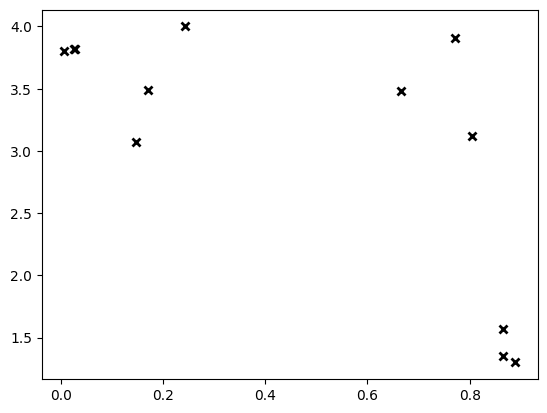

In [2]:
X = np.array(
    [
        [0.865], [0.666], [0.804], [0.771], [0.147], [0.866], [0.007], [0.026],
        [0.171], [0.889], [0.243], [0.028],
    ]
)
Y = np.array(
    [
        [1.57], [3.48], [3.12], [3.91], [3.07], [1.35], [3.80], [3.82], [3.49],
        [1.30], [4.00], [3.82],
    ]
)

plt.plot(X, Y, "kx", mew=2)

In [3]:
X

array([[0.865],
       [0.666],
       [0.804],
       [0.771],
       [0.147],
       [0.866],
       [0.007],
       [0.026],
       [0.171],
       [0.889],
       [0.243],
       [0.028]])

In [4]:
Y

array([[1.57],
       [3.48],
       [3.12],
       [3.91],
       [3.07],
       [1.35],
       [3.8 ],
       [3.82],
       [3.49],
       [1.3 ],
       [4.  ],
       [3.82]])

In [5]:
model = gpflow.models.GPR(
    (X, Y),
    kernel=gpflow.kernels.SquaredExponential(),
)

2025-11-19 03:09:56.842053: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables)

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 16.45115183214256
        x: [-7.928e-01  1.165e+01 -1.305e+00]
      nit: 18
      jac: [ 4.735e-06 -5.010e-07  2.479e-05]
     nfev: 24
     njev: 24
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [7]:
Xnew = np.array([[0.5]])
model.predict_f(Xnew)

(<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[4.28009566]])>,
 <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.30584767]])>)

In [8]:
Xplot = np.linspace(-0.1, 1.1, 100)[:, None]

In [9]:
f_mean, f_var = model.predict_f(Xplot, full_cov=False)
y_mean, y_var = model.predict_y(Xplot)

In [10]:
f_lower = f_mean - 1.96 * np.sqrt(f_var)
f_upper = f_mean + 1.96 * np.sqrt(f_var)
y_lower = y_mean - 1.96 * np.sqrt(y_var)
y_upper = y_mean + 1.96 * np.sqrt(y_var)

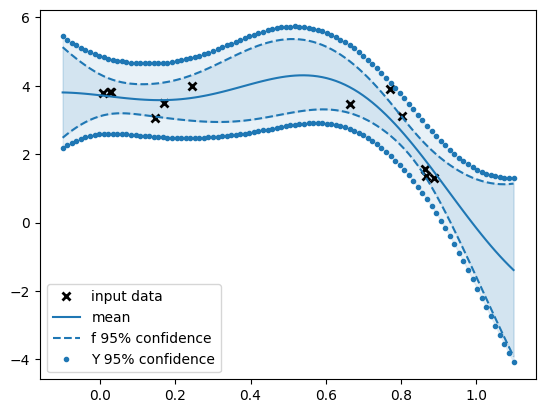

In [11]:
plt.plot(X, Y, "kx", mew=2, label="input data")
plt.plot(Xplot, f_mean, "-", color="C0", label="mean")
plt.plot(Xplot, f_lower, "--", color="C0", label="f 95% confidence")
plt.plot(Xplot, f_upper, "--", color="C0")
plt.fill_between(
    Xplot[:, 0], f_lower[:, 0], f_upper[:, 0], color="C0", alpha=0.1
)
plt.plot(Xplot, y_lower, ".", color="C0", label="Y 95% confidence")
plt.plot(Xplot, y_upper, ".", color="C0")
plt.fill_between(
    Xplot[:, 0], y_lower[:, 0], y_upper[:, 0], color="C0", alpha=0.1
)
plt.legend()